# **`LegoNLP Toolkit for Digital Humanities and Education`**
* [Motasem Alrahabi](https://obtic.sorbonne-universite.fr/alrahabi/index.html), ObTIC, Sorbonne Université

* This notebook: https://rb.gy/3zyqzk

* Shared document https://tinyurl.com/v86k9r8y

*  2025


<img src="https://raw.githubusercontent.com/obtic-sorbonne/LegoNLP/0b2c2126968023b327a17c4e3448d157df7c06e7/img/legoNLP.png"/>

## `Summary`

**The objective of this activity is to demystify coding in Python** for data processing and analysis in the humanities and social sciences (HSS) through a variety of NLP tasks for data collection, analysis, and visualization.

* This notebook is composed of **modular** and **independent** blocks or cells, allowing users to create **customized** pipelines tailored to their specific needs.

* The pipeline follows a logical sequence, from data gathering to visualization, including various text analysis steps.

* The flexible structure also enables users to skip, add, or combine cells as needed, with support available from tools like ChatGPT.
* Each cell can be modified, whether by adjusting the input text, replacing the model, or editing the code.
 <img src="https://raw.githubusercontent.com/obtic-sorbonne/repo/back/input%20output.png" width="250" height="75"/>


* [Python](https://www.python.org/) : a popular programming language for NLP and AI (see: https://programminghistorian.org/fr/)

* A notebook like [Google Colab](https://colab.research.google.com/) is an online environment with free GPU access that allows users to run and share code without installing software. It supports various languages like Python and works across all platforms (Mac, Windows, Linux), eliminating issues with version compatibility or operating systems. See this [tutorial](https://runestone.academy/ns/books/published/httlads/PythonReview/google_colab.html) or this [video](https://www.youtube.com/watch?v=inN8seMm7UI&t=189s).


## `Presentation`

The latest advances in the field of deep learning have had a significant impact on many areas, including the humanities and social sciences. These innovations particularly encourage the development of [digital humanities](https://en.wikipedia.org/wiki/Digital_humanities), enriching research, teaching, and learning.

This practical workshop, designed for beginners, aims to explore the potential of these emerging technologies applied to texts, even though these advancements also apply to other types of data such as images, videos, numbers, etc.

  <img src="https://raw.githubusercontent.com/obtic-sorbonne/repo/back/data.png" width="500" height="83"/>


We will focus on key data processing steps, including their acquisition, preprocessing, analysis, extraction, and transformation.

  <img src="https://raw.githubusercontent.com/obtic-sorbonne/repo/back/pipeline.png" width="500" height="256"/>
  
For this, we will look at ready-to-use libraries: the goal being to simplify computer coding, and to go further when necessary. Here are some useful definitions:

* Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a multidisciplinary field involving linguistics, computer science, and artificial intelligence. It allows computers to understand, generate and manipulate human language.

* The objective of NLP is to analyze language data (written or spoken), in order to perform a certain number of tasks such as classification, generation, question answering, summarizing, etc.

* NLP approaches include rule-based systems, statistical methods, machine and deep learning (both supervised and unsupervised), large language models (LLMs) and transformer architectures.

* A Large Language Model ([LLM](https://en.wikipedia.org/wiki/Large_language_model)) is an AI system trained on vast amounts of data to understand and generate human-like text.

* The LLMs use advanced neural network architectures like transformers, very effective at processing large sequences of textual data, but consume more resources (previously, it was RNNs, LSTMs...).

* [Transformers](https://fr.wikipedia.org/wiki/Transformeur) are a specific architecture used in many modern LLMs, notable for its attention mechanism, which selectively focuses on different parts of the input data, making it very effective for tasks that require understanding the context.

* Basic NLP tasks, like preprocessing operations, often use existing libraries such as NLTK, spaCy, or Textblob.

* Sometimes, tackling more complex NLP challenges specific to certain domains or needs may involve fine-tuning models on targeted datasets, applying transfer learning to new tasks, adapting to domain-specific distributions, augmenting data to enhance generalization, and injecting knowledge to enrich the model.

⌛ *Estimated time to complete this hands-on activity: approximately 1 or 2 hours.*

🚨 *The first thing to do is to save a copy of this notebook to your Google Drive (File menu).*

❗*The libraries used in this notebook primarily work for English. However, they can be adapted to other languages, provided they are available.*


🚀 C'est parti !

---



## `1 Data Acquisition`

### `1-1) Using APIs`
We can collect free data from the internet by downloading it directly from public databases or utilizing APIs from open data platforms provided by governments ([US Data.gov](https://www.data.gov/), [French Data.gouv](https://www.data.gouv.fr/)), academic institutions ([Harvard Dataverse](https://dataverse.harvard.edu/), [HAL](https://hal.archives-ouvertes.fr/)), cultural institutions ([Internet Archive](https://archive.org/), [BNF Gallica](https://gallica.bnf.fr/), [HathiTrust Digital Library](https://www.hathitrust.org/)), non-profit platforms ([Wikimedia](https://www.wikimedia.org/), [Wikisource](https://wikisource.org/), [Project Gutenberg](https://www.gutenberg.org/), [Common Crawl](https://commoncrawl.org/)), international entities ([World Bank Open Data](https://data.worldbank.org/), [UN Data](http://data.un.org/), [European data](https://data.europa.eu/en)), or social media ([Twitter API](https://developer.twitter.com/en/docs/twitter-api)).

🔥*An API (Application Programming Interface) is a set of protocols and tools that allows different applications to communicate together.*

In [ ]:
# This script downloads a document in text format from the Gallica API (if available).
import requests

ark = 'bpt6k6305332g'   # identifier of "Le Père Goriot"
base_url = f'https://gallica.bnf.fr/ark:/12148/{ark}'
text_url = f'{base_url}/texteBrut'

response = requests.get(text_url)
if response.status_code == 200:
    with open('document.html', 'w', encoding='utf-8') as file:
        file.write(response.text)
    print("The text file has been successfully downloaded, and saved at document.html.")
else:
    print("The text format is not available. Please check the ARK or try again later.")

The text file has been successfully downloaded, and saved at document.html.


👉 *See also this tool: https://obtic.huma-num.fr/gallica-obvie/*

In [ ]:
# 🚧 under development Li
import requests
import os
from urllib.parse import urlencode
from xml.etree import ElementTree as ET

# Function to build a CQL query
def build_cql_query(**kwargs):
    # Build the query conditions dynamically
    return " and ".join(f"dc.{key} all '{value}'" for key, value in kwargs.items() if value)

# Function to test the validity of the query
def test_query_response(url, params):
    # Test the query by sending it to the base URL
    try:
        print(f"Generated URL: {url}?{urlencode(params)}")
        print("Testing the query...")
        response = requests.get(url, params=params, timeout=10)
        response.raise_for_status()  # Raise HTTPError for bad HTTP responses (4xx or 5xx)
        print("Query successful. Response received.")
        return response
    except requests.exceptions.RequestException as e:
        # Handle HTTP-related errors (connection issues, timeout, etc.)
        print(f"Error during HTTP request: {e}")
        return None

# Function to download a single file
def download_file(url, download_dir):
    try:
        file_name = os.path.basename(url)
        file_path = os.path.join(download_dir, file_name)
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        with open(file_path, "wb") as file:
            file.write(response.content)
        print(f"File saved: {file_path}")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading {url}: {e}")

# Function to download results and their content
def download_documents_and_fulltext(cql_query, max_records=100):
    # Ensure the query is not empty
    if not cql_query.strip():
        print("Error: The 'query' parameter is empty. The query cannot be sent.")
        return

    params = {
        "version": "1.2",
        "operation": "searchRetrieve",
        "query": cql_query,
        "startRecord": 1,
        "maximumRecords": max_records
    }

    # Test the query
    response = test_query_response("https://gallica.bnf.fr/SRU", params)
    if not response:
        return

    # Check if the response contains results
    try:
        xml_root = ET.fromstring(response.content)
        records = xml_root.findall(".//{http://www.loc.gov/zing/srw/}record")
        print(f"Number of records found: {len(records)}")
        if not records:
            print("No results found for this query.")
            return
    except ET.ParseError:
        # Handle XML parsing errors
        print("XML parsing error in the response.")
        return

    # Create a download directory
    download_dir = "downloads"
    os.makedirs(download_dir, exist_ok=True)

    # Download metadata and associated documents
    for i, record in enumerate(records, start=1):
        print(f"Processing record {i}/{len(records)}...")  # Log current record
        metadata = record.find(".//{http://www.loc.gov/zing/srw/}recordData")
        if metadata is not None:
            identifiers = metadata.findall(".//{http://purl.org/dc/elements/1.1/}identifier")
            print(f"Identifiers found: {len(identifiers)}")  # Log identifiers count
            for identifier in identifiers:
                url = identifier.text
                print(f"Downloading: {url}")
                download_file(url, download_dir)
        else:
            print("No metadata found for this record.")

# Example usage & See also: https://www.bnf.fr/sites/default/files/2019-04/tableau_criteres_sru.pdf
if __name__ == "__main__":
    query = build_cql_query(
        subject="récit voyage",
        # creator="balzac",
        # title="récits de voyage",
        # date="1930",  #bib.publicationdate
        # language="fre",  # (e.g., 'fre', 'eng', 'lat', 'ger', 'ita', 'spa'...)
        # type="monographie",  # (e.g., 'monographie', 'carte', etc.)
        # format="pdf"  # (e.g., 'pdf', 'txt')
    )
    print(f"Generated CQL Query: {query}")
    download_documents_and_fulltext(query, max_records=5)

Generated CQL Query: dc.subject all 'récit voyage'
Generated URL: https://gallica.bnf.fr/SRU?version=1.2&operation=searchRetrieve&query=dc.subject+all+%27r%C3%A9cit+voyage%27&startRecord=1&maximumRecords=5
Testing the query...
Query successful. Response received.
Number of records found: 5
Processing record 1/5...
Identifiers found: 1
Downloading: https://gallica.bnf.fr/ark:/12148/btv1b52516207m
File saved: downloads/btv1b52516207m
Processing record 2/5...
Identifiers found: 1
Downloading: https://gallica.bnf.fr/ark:/12148/btv1b10030334r
File saved: downloads/btv1b10030334r
Processing record 3/5...
Identifiers found: 1
Downloading: https://gallica.bnf.fr/ark:/12148/btv1b10031132f
File saved: downloads/btv1b10031132f
Processing record 4/5...
Identifiers found: 1
Downloading: https://gallica.bnf.fr/ark:/12148/btv1b108848391
File saved: downloads/btv1b108848391
Processing record 5/5...
Identifiers found: 1
Downloading: https://gallica.bnf.fr/ark:/12148/btv1b10032877b
File saved: downloads

In [ ]:
# This code downloads a book from Project Gutenberg website using its ID and saves it as a text file.
import requests
book_id = 3435    # The Thousand and one Night
file_path = "book.txt"
url = f"https://www.gutenberg.org/cache/epub/{book_id}/pg{book_id}.txt"
response = requests.get(url)

if response.status_code == 200:
    with open(file_path, 'w', encoding='utf-8') as file:
        file.write(response.text)
    print(f"Book saved as : {file_path}")
else:
    print("Error downloading the book")

Book saved as : book.txt


In [ ]:
# This code downloads a book from Google Books API
query = 'intitle:Pride and Prejudice'
url = f"https://www.googleapis.com/books/v1/volumes?q={query}"
response = requests.get(url)
data = response.json()
for item in data.get('items', []):
    access_info = item['accessInfo']
    if access_info.get('publicDomain', False) and access_info['pdf'].get('isAvailable', False):
        pdf_link = access_info['pdf'].get('downloadLink')
        if pdf_link:
            pdf_response = requests.get(pdf_link)
            print(f"Direct download link: {pdf_link}")
            if pdf_response.status_code == 200:
                with open('Pride_and_Prejudice.pdf', 'wb') as f:
                    f.write(pdf_response.content)
                print("Download completed successfully.")
                break
else:
    print("No suitable PDF available for download.")

Direct download link: http://books.google.com/books/download/Pride_and_Prejudice.pdf?id=s1gVAAAAYAAJ&hl=&output=pdf&sig=ACfU3U3dQw5JDWdbVgk2VRHyDjVMT4oIaA&source=gbs_api
Download completed successfully.


### `1-2) With Search Engines`
We can use search engine results to find relevant information and gather sources for academic research.

In [ ]:
# This script searches for the top n Google search results for a given query, then downloads the corresponding web pages locally.
import requests
from googlesearch import search
query = "deep learning"
search_results = [result for result in search(query, stop=5)]  # stop est le nbre max de résultats

for i, result in enumerate(search_results, start=1):
    print(f"{i}. {result}")
    file_name = f"{i}_{result.replace('/', '_').replace(':', '_')}.html"
    with open(file_name, 'wb') as file:
        file.write(requests.get(result).content)
        #files.download(file_name)

1. https://en.wikipedia.org/wiki/Deep_learning
2. https://en.wikipedia.org/wiki/Comparison_of_deep_learning_software
3. https://en.wikipedia.org/wiki/Feature_learning
4. https://en.wikipedia.org/wiki/Deep_belief_network
5. https://en.wikipedia.org/wiki/Transformer_(deep_learning_architecture)


🚴‍♂️ *Exercise: Try to modify the "query" variable.*

### `1-3) Scraping`

Using web scraping tools to extract information from publicly accessible websites (ex: using Python libraries like BeautifulSoup or Scrapy to extract all the headlines from a news website).

In [ ]:
# This code fetches a specific webpage specified by the URL, extracts and prints its main text content.
!pip install newspaper3k lxml_html_clean > /dev/null 2>&1

from newspaper import Article
url = 'https://en.wikipedia.org/wiki/Paris'
article = Article(url)
article.download()
article.parse()
print(article.text[:500])  # Imprime les 500 premiers caractères du contenu principal

Capital and most populous city of France

This article is about the capital city of France. For other uses, see Paris (disambiguation)

"Parisien" redirects here. For other uses, see Parisien (disambiguation)

Place in Île-de-France, France

Paris (French pronunciation: [paʁi] ⓘ) is the capital and largest city of France. With an estimated population of 2,102,650 residents in January 2023[2] in an area of more than 105 km2 (41 sq mi),[5] Paris is the fourth-most populous city in the European Uni


👉 *See also this tool: https://github.com/medialab/minet*

## `--------------------------------`

## `2 Converting`

### `2-1) Image to Text`
OCR (Optical Character Recognition) automates the conversion of printed or typed text from images, enabling the extraction of machine-readable text, whereas HTR (Handwritten Text Recognition) specifically focuses on recognizing and transcribing handwritten content.

In [ ]:
# This code extracts text from a given image using OCR with Tesseract, and prints the extracted text.
!pip install pytesseract > /dev/null 2>&1
!apt install -q tesseract-ocr-eng > /dev/null 2>&1
# tesseract-ocr-fra tesseract-ocr-ara

import pytesseract
import os
from PIL import Image
from io import BytesIO

image_url = "https://raw.githubusercontent.com/obtic-sorbonne/repo/back/english.png"
response = requests.get(image_url)
if response.status_code == 200:
    image = Image.open(BytesIO(response.content))
    os.environ['TESSDATA_PREFIX'] = '/usr/share/tesseract-ocr/4.00/tessdata'
    pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'
    text = pytesseract.image_to_string(image, config='--psm 6', lang='eng')
    print("Text extracted from the image:")
    print(text[:500])
else:
    print("Failed to download the image, HTTP status:", response.status_code)

Text extracted from the image:
' LES MISERABLES
BOOK I—THE FALL
THE NIGHT OF A DAY’S TRAMP

Aw hour before sunset, on the evening of a day in the beginning of
October, 1815, a man travelling afoot entered the little town of
D——. The few persons who at this time were at their windows
or their doors, regarded this traveller with a sort of distrust. It
would have been hard to find a passerby more wretched in appear-
ance, He was a man of middle height, stout and hardy, in the
strength of maturity; he might have been forty-six or


❓*Do you see any errors in the result?*

🚴‍♂️ *Exercise: duplicate the previous cell and :*
- replace *image_url value with:
.../arabic.png or .../french.png*
- replace *image_to_string value with:
(image, config='--psm 6', lang='fra') or (image, config='--oem 3 --psm 6 -l ara', lang='ara')*

🔗 *See also https://escriptorium.isir.upmc.fr/ (for OCR & HTR)*

### `2-2) Speech to Text`


Audio-to-text or voice recognition is the process that transcribes spoken language into written text.


In [ ]:
# This script downloads an audio file from commons.wikimedia.org, then uses the Whisper model to transcribe the audio content into text.
!pip install -q openai-whisper > /dev/null 2>&1
import os
import whisper

audio_url = "https://upload.wikimedia.org/wikipedia/commons/a/aa/1943_Nov_14_NYPhil_Bernstein.ogg"
os.system(f"wget {audio_url} -O audio.ogg")
model = whisper.load_model("base")
result = model.transcribe("audio.ogg")
print("Transcription: ", result['text'])

100%|███████████████████████████████████████| 139M/139M [00:01<00:00, 91.0MiB/s]
/usr/local/lib/python3.11/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this exper

Transcription:   هبي موصوات وكبيدية العرام يا؟ بقناة وكبيدية مستميلا الاجار مليا بيسمت ورحب بكم أجملة الحيب إلى مقادة نشتده ننمقادة وكبيدية مقادة اليومان الطعرام الطائرة هي مركبة جوية أقل من الهوى تستخدمك وسلة نقر جوية تحلق ماشرعيا أو بمحرق واحد أو أقر تصطيو الطياران في الهوى اعتماد أن على قوة الرفى المتولد على أجنحتها أو عن طريق قوة سحب الهوى الأسسل المية لسنعت الطائرة يستخدموا في السنعت الطائرات احد اثناء الوائد تولوجيا التي تصل إلى يهل الام على الاطلاق كان ذلك في مجرخة المعد المرتبط بالحيكة الغارجي للطائرة أو بالولوم الالفترومي كنكية أن مجسم الطائرة الغارجي فهو مصوعة من سبكية من الالفولات والالمينيوم وهي سبيكة ترتيقوة الفولات وخفة الغالمينيوم وجسم الطائرات تكوى نمي صفاء حام عبي سبيكة مطسلة بعبها ببعض عن طريق وصلاة اسفينية ربعية أو سدسية صفوف كلمستغدمة في بناء المراجل البغارية من مياطين لهذه وصلاة قوة جد كبير وقوة تحمل لطن أكبر يمنى عادة المهند سنة والعملون في السنعتها هيك الاططائرات من استغدام أقل مرساص وذلك لحتوائها على الكربون الذي يتفاع لو بضوره مع الالمينيوم مشكل ثقوباً وفجوات ف

👉 *Replace the file link with another one in a different language (from the same website...)*

In [ ]:
# This script downloads an audio from a YouTube video and transcribes it into text using Whisper.
!pip install -q yt-dlp > /dev/null 2>&1

video_url = "https://www.youtube.com/watch?v=MS5UjNKw_1M"
os.system(f"yt-dlp -f 'bestaudio[ext=m4a]' {video_url} -o 'audio.%(ext)s'")
model = whisper.load_model("base")
result = model.transcribe("audio.m4a")
print(result['text'])

/usr/local/lib/python3.11/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(fp, map_location=device)
/usr/local/li

 I... So in love with you. This is your victory. Now I know you didn't do this just to win an election. And I know you didn't do it for me. You did it because you understand the enormity of the task that lies ahead. But my main message is to the parents of Trayvon Martin. You know, if I had a son, he'd look like Trayvon. They had their entire lives ahead of them. Birthdays, graduations, weddings, kids of their own. Among the fallen were also teachers, men and women who devoted their lives to helping our children fulfill their dreams. So our hearts are broken today. It's the idea held by generations of citizens who believe that America is a constant work in progress. Who believe that loving this country requires more than singing its praises or avoiding uncomfortable truths. It requires the occasional disruption, the willingness to speak out for what is right to shake up the status quo that's America. Me, Zingring, her sweet, the sound that saved a wretch by me. And facts, evidence, rea

🚴‍♂️ *Exercise: try to customize the youtube link...*

## `--------------------------------`

## `3 Preprocessing and Normalization`

* Generally, in order to carry out these different tasks, we apply a series of preprocessing to the textual data: correcting, tokenization, cleaning, removing common words or stopwords, lowercase conversion, normalization, encoding or vectorization, language detection, etc.

  <img src="https://raw.githubusercontent.com/obtic-sorbonne/repo/back/preprocessing.png" width="400" height="199"/>


### `3-1) Spell Checking and Correction`


Performing spell checking and correction enables us to standardize text and improve the quality of the data.

In [ ]:
# This script corrects spelling errors in the input text using the spaCy library and a spell-checking extension.
!pip install spacy contextualSpellCheck > /dev/null 2>&1
!python -m spacy download en_core_web_sm > /dev/null 2>&1

import spacy, contextualSpellCheck

nlp_eng = spacy.load('en_core_web_sm')
contextualSpellCheck.add_to_pipe(nlp_eng)
#!python -m spacy download fr_core_news_sm > /dev/null 2>&1
#nlp_fra = spacy.load('fr_core_news_sm')
#contextualSpellCheck.add_to_pipe(nlp_fra)
input_text = "Aw hour before sunset, on the evening of a day in the beginning of"
doc = nlp_eng(input_text)
print("the corrected text is: \n", doc._.outcome_spellCheck)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

the corrected text is: 
 An hour before sunset, on the evening of a day in the beginning of


### `3-2) Tokenization and Lowercasing`

Lowercasing: Convert all text to lowercase to ensure consistency and avoid treating words with different cases as distinct.

Hello World! --> hello world!

Tokenization: Break the text into individual words or tokens. This step is essential for further analysis and feature extraction.

Text: "Life is good."
Tokens: ["Life", "is", "good", "."]

Generally, these two steps are performed together.

In [ ]:
# The script tokenizes the input text into words using NLTK's word_tokenize function, then prints the list of words and their lowercase versions.
!pip install nltk > /dev/null 2>&1

import nltk

from nltk.tokenize import word_tokenize

#nltk.download('punkt')
nltk.download('punkt_tab')
input_text = "The Quick BROWN Fox!"
tokens = word_tokenize(input_text)
print(tokens)
print([token.lower() for token in tokens])
print(list(input_text))  # Imprime chaque caractère de la chaîne d'entrée

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['The', 'Quick', 'BROWN', 'Fox', '!']
['the', 'quick', 'brown', 'fox', '!']
['T', 'h', 'e', ' ', 'Q', 'u', 'i', 'c', 'k', ' ', 'B', 'R', 'O', 'W', 'N', ' ', 'F', 'o', 'x', '!']


### `3-3) Split texts into sentences`
In NLP, splitting texts into sentences involves identifying and separating individual sentences from a continuous text.

In [ ]:
# Splitting a text into sentences using NLTK's sent_tokenize function and printing each sentence separately.
!pip install nltk > /dev/null 2>&1

import nltk

nltk.download('punkt_tab')
input_text = "The Quick BROWN Fox! Jumps over the lazy dog. The dog looks up and watches the fox with curiosity."
sentences = nltk.sent_tokenize(input_text)
for sentence in sentences:
    print(sentence.strip())

The Quick BROWN Fox!
Jumps over the lazy dog.
The dog looks up and watches the fox with curiosity.


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### `3-4) Removing Punctuation`
Eliminate non-alphabetic characters, such as punctuation marks, symbols, and numbers, which may not contribute significantly to the analysis.

In [ ]:
# This script tokenizes a text into words, filters out tokens that are not purely alphabetic, and reconstructs the text from the filtered tokens.
!pip install nltk > /dev/null 2>&1

import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')
input_text = "Hello, world! This is an example text with punctuation & special characters."
tokens = word_tokenize(input_text)
filtered_tokens = [token for token in tokens if token.isalpha()]
cleaned_text = " ".join(filtered_tokens)

print("Original Text:", input_text)
print("Cleaned Text:", cleaned_text)

Original Text: Hello, world! This is an example text with punctuation & special characters.
Cleaned Text: Hello world This is an example text with punctuation special characters


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### `3-5) Removing Stopwords`

Remove common words (stopwords) like "and", "the", "is", "for", etc., as they often do not carry much meaning and can be noise in the data.

In [ ]:
# Using NLTK, this code tokenizes a text, removes stopwords, and prints the remaining tokens that are not considered stopwords.
!pip install nltk > /dev/null 2>&1

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')
nltk.download('stopwords')
input_text = "This text contains specific words that you want to process."
tokens = word_tokenize(input_text)
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
#stopwords_removed = [token for token in tokens if token.lower() in stop_words]  #exercice: demander à le deviner !
print(filtered_tokens)

['text', 'contains', 'specific', 'words', 'want', 'process', '.']


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### `3-6) Lemmatization`
Lemmatization is a process where words are reduced to their base or dictionary form, known as a lemma:

writing, wrote, written  → write

In [ ]:
# The script generates with spacy the lemmatized form of each word of an input text.
!pip install spacy > /dev/null 2>&1
!python -m spacy download en_core_web_sm > /dev/null 2>&1

import spacy
nlp_eng = spacy.load('en_core_web_sm')

#!python -m spacy download fr_core_news_sm > /dev/null 2>&1
#nlp_fra = spacy.load('fr_core_news_sm')

input_text = "Cats are running and playing in the garden. The sun is shining brightly."
lemmatized = ' '.join([token.lemma_ for token in nlp_eng(input_text)])
print(lemmatized)

cat be run and play in the garden . the sun be shine brightly .


### `3-7) Embeddings`

Embeddings are numerical representations of words used to capture relationships and similarities between them in a lower-dimensional space.

In word embeddings like Word2Vec, GloVe or FastText, words with similar meanings are represented as vectors that are close to each other in the embedding space. For instance, the vectors for "king" and "queen" are expected to be close, reflecting their semantic relationship.

In [ ]:
# This script finds the most similar words to a given word, according to an embedding model
import gensim.downloader as api

model_glove = api.load("glove-wiki-gigaword-100")
word = "king"
similar_words = model_glove.most_similar(word, topn=5)
for term, similarity in similar_words:
    print(f"{term}: {similarity:.4f}")
# The score: Cosine similarity between the vector representations of the target word and all other words in the vocabulary
# 1 indicates perfect similarity, 0 indicates no similarity, and -1 indicates perfect dissimilarity.

[==================================================] 100.0% 128.1/128.1MB downloaded
prince: 0.7682
queen: 0.7508
son: 0.7021
brother: 0.6986
monarch: 0.6978


In [ ]:
# This script finds a word that relates to "woman" in the same way "man" relates to "king"
import gensim.downloader as api
model_glove = api.load("glove-wiki-gigaword-100")
result = model_glove.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(f"'woman' is to 'king' as 'man' is to '{result[0][0]}'")

'woman' is to 'king' as 'man' is to 'queen'


king is in cluster 1
queen is in cluster 1
man is in cluster 1
woman is in cluster 1
apple is in cluster 0
orange is in cluster 0
france is in cluster 2
germany is in cluster 2


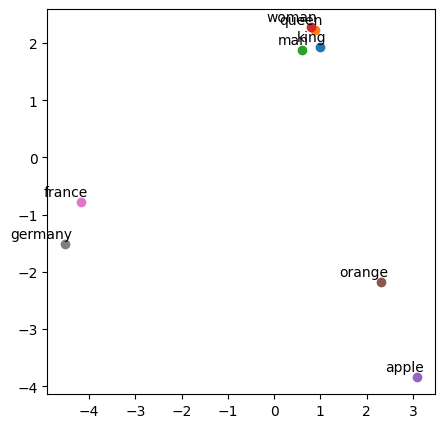

In [ ]:
# This script clusters specific words into groups using their GloVe vector representations and K-means clustering
import gensim.downloader as api
model_glove = api.load("glove-wiki-gigaword-100")
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = ['king', 'queen', 'man', 'woman', 'apple', 'orange', 'france', 'germany']
word_vectors = [model_glove[word] for word in words]
kmeans = KMeans(n_clusters=3, random_state=0).fit(word_vectors)
clusters = kmeans.labels_
for word, cluster in zip(words, clusters):
    print(f"{word} is in cluster {cluster}")

pca = PCA(n_components=2)
word_vecs_2d = pca.fit_transform(word_vectors)
plt.figure(figsize=(5, 5))
for i, word in enumerate(words):
    plt.scatter(word_vecs_2d[i, 0], word_vecs_2d[i, 1])
    plt.annotate(word, xy=(word_vecs_2d[i, 0], word_vecs_2d[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()

⚓ *See also: https://projector.tensorflow.org/ and https://embeddings.sketchengine.eu/*

## `--------------------------------`


## `4 Statistical Linguistic Analysis`

### `4-1) Language Detection`
In NLP, the language of a text can be automatically detected using various libraries and methods, including statistical analysis, machine learning models, and dedicated libraries like Langdetect and FastText.

In [ ]:
# This code detects the language of the input text using a python library.
!pip install langdetect > /dev/null 2>&1

from langdetect import detect

input_text = "Hi, my name is Bob, how are you?"
detected_language = detect(input_text)
print(f"Detected language: {detected_language}")

Detected language: en


👉 *Try to modify the content of the "input_text" variable and observe the results*

### `4-2) Sentence Length Average`
The sentence length average is a measure that calculates the mean number of words per sentence in a given text. It provides an insight into the text's complexity and readability.

Total Words: 116
Total Sentences: 5
Average Words per Sentence: 23.2


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


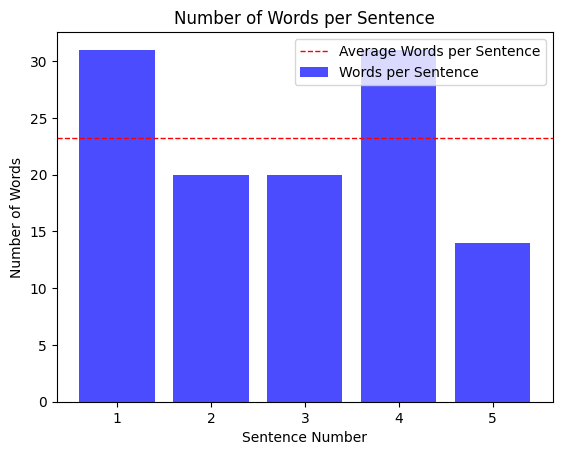

In [ ]:
# This script calculates and prints the total number of words, total number of sentences, and average number of words per sentence in a provided text using NLTK for tokenization.
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import sent_tokenize

input_text = """
Transformers are a deep learning model crucial for natural language processing (NLP), introduced in the "Attention is All You Need"
paper by Vaswani et al. They excel in tasks like machine translation, text summarization, and sentiment analysis due to the self-attention mechanism.
This mechanism helps the model prioritize different parts of the input, enabling it to manage long-range dependencies effectively.
Models like BERT, GPT, and T5, using transformer technology, have significantly advanced NLP by setting new benchmarks
in language understanding, text generation, and question-answering. A word cloud of this content would highlight the most frequent terms used.
"""

sentences = sent_tokenize(input_text)
total_words = sum(len(word_tokenize(sentence)) for sentence in sentences)
total_sentences = len(sentences)
average_words_per_sentence = total_words / total_sentences

print("Total Words:", total_words)
print("Total Sentences:", total_sentences)
print("Average Words per Sentence:", average_words_per_sentence)

sentence_lengths = [len(word_tokenize(sentence)) for sentence in sentences]
fig, ax = plt.subplots()
ax.bar(range(1, total_sentences + 1), sentence_lengths, color='blue', alpha=0.7)
ax.axhline(average_words_per_sentence, color='red', linestyle='dashed', linewidth=1)
ax.set_xlabel('Sentence Number')
ax.set_ylabel('Number of Words')
ax.set_title('Number of Words per Sentence')
ax.legend(['Average Words per Sentence', 'Words per Sentence'])
plt.show()

### `4-3) Words Frequency`
This feature engineering allows us to capture relevant information for the analysis.


In [ ]:
print("Bonjour")

Bonjour


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Absolute frequency of words: Counter({'the': 5, 'in': 3, 'and': 3, 'a': 2, 'model': 2, 'language': 2, 'nlp': 2, 'by': 2, 'like': 2, 'text': 2, 'to': 2, 'mechanism': 2, 'this': 2, 'of': 2, 'transformers': 1, 'are': 1, 'deep': 1, 'learning': 1, 'crucial': 1, 'for': 1, 'natural': 1, 'processing': 1, 'introduced': 1, 'attention': 1, 'is': 1, 'all': 1, 'you': 1, 'need': 1, 'paper': 1, 'vaswani': 1, 'al': 1, 'they': 1, 'excel': 1, 'tasks': 1, 'machine': 1, 'translation': 1, 'summarization': 1, 'sentiment': 1, 'analysis': 1, 'due': 1, 'helps': 1, 'prioritize': 1, 'different': 1, 'parts': 1, 'input': 1, 'enabling': 1, 'it': 1, 'manage': 1, 'dependencies': 1, 'effectively': 1, 'models': 1, 'bert': 1, 'gpt': 1, 't5': 1, 'using': 1, 'transformer': 1, 'technology': 1, 'have': 1, 'significantly': 1, 'advanced': 1, 'setting': 1, 'new': 1, 'benchmarks': 1, 'understanding': 1, 'generation': 1, 'word': 1, 'cloud': 1, 'content': 1, 'would': 1, 'highlight': 1, 'most': 1, 'frequent': 1, 'terms': 1, 'used'

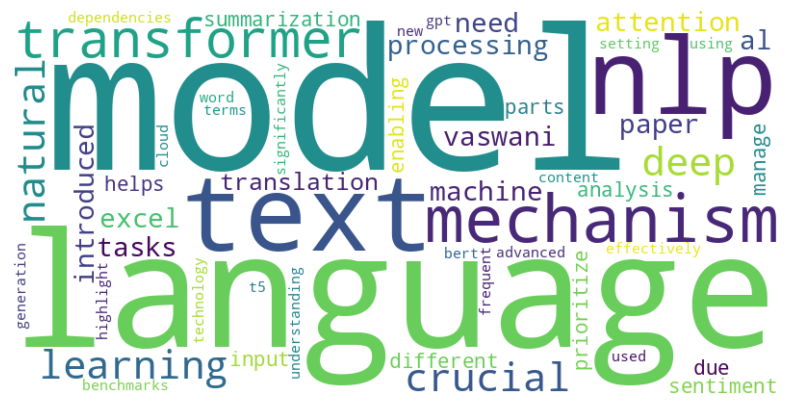

In [ ]:
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud

nltk.download('punkt_tab')
nltk.download('stopwords')

input_text = """
Transformers are a deep learning model crucial for natural language processing (NLP), introduced in the "Attention is All You Need"
paper by Vaswani et al. They excel in tasks like machine translation, text summarization, and sentiment analysis due to the self-attention mechanism.
This mechanism helps the model prioritize different parts of the input, enabling it to manage long-range dependencies effectively.
Models like BERT, GPT, and T5, using transformer technology, have significantly advanced NLP by setting new benchmarks
in language understanding, text generation, and question-answering. A word cloud of this content would highlight the most frequent terms used.
"""

tokens = word_tokenize(input_text)
tokens = [word.lower() for word in tokens]
stop_words = set(stopwords.words('french'))
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
abs_frequency = Counter(filtered_tokens)
print("Absolute frequency of words:", abs_frequency)   # how many times each word appears
total_words = len(filtered_tokens)
rel_frequency = {word: count / total_words for word, count in abs_frequency.items()}
print("Relative frequency of words:", rel_frequency) # the proportion of each word relative to the total number of words in the text
print("Total number of words:", total_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

👉 *A word cloud is a visual representation that shows the frequency of words in a text, with more common words appearing larger.*

🌐*See also: https://www.wordclouds.com/*

### `4-4) Lexical Dispersion`
Lexical dispersion is a measure that shows the distribution and occurrence of specific words throughout a text.

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


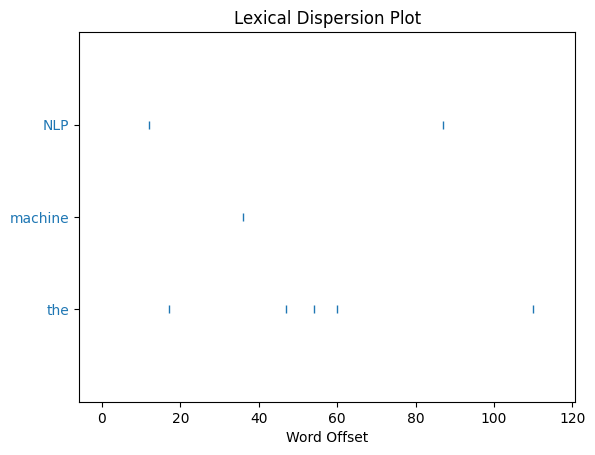

In [ ]:
# The script creates a dispersion plot that visually represents the frequency and distribution of selected words across a text.
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk import Text

text = """
Transformers are a deep learning model crucial for natural language processing (NLP), introduced in the "Attention is All You Need"
paper by Vaswani et al. They excel in tasks like machine translation, text summarization, and sentiment analysis due to the self-attention mechanism.
This mechanism helps the model prioritize different parts of the input, enabling it to manage long-range dependencies effectively.
Models like BERT, GPT, and T5, using transformer technology, have significantly advanced NLP by setting new benchmarks
in language understanding, text generation, and question-answering. A word cloud of this content would highlight the most frequent terms used.
"""
words_to_analyze = ['NLP', 'machine', 'the']

tokens = word_tokenize(text)
text_nltk = Text(tokens)
text_nltk.dispersion_plot(words_to_analyze)
plt.show()

💡*See also the tool Trends in https://voyant-tools.org/*

### `4-5) Lexical Diversity`
Lexical richness measures the diversity of a text's vocabulary by evaluating the number and variety of words used.

The main approaches to calculating lexical richness include the Type-Token Ratio (TTR), Guiraud's index, Herdan's index, Maas' index, D measure, and Brunet's index, each aiming to normalize and estimate lexical diversity based on text length, as well as comparing a text to a reference using lexical distance or similarity indices.

The TTR calculates the ratio between the number of unique words and the total number of words, ranging from 0 to 1.

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


The lexical richness of the text is: 0.57


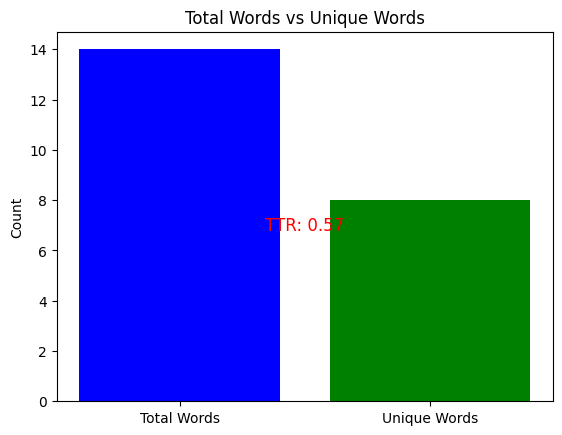

In [ ]:
# Here, we calculate and visualize the lexical richness of a given text by computing the TTR
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

text = "The cat sleeps all the. The cat eats. The cat plays."
words = word_tokenize(text)
unique_words = set(words)
number_unique_words = len(unique_words)
total_number_words = len(words)
TTR = number_unique_words / total_number_words
print("The lexical richness of the text is:", round(TTR, 2))

# Visualization
labels = ['Total Words', 'Unique Words']
values = [total_number_words, number_unique_words]
fig, ax = plt.subplots()
ax.bar(labels, values, color=['blue', 'green'])
ax.set_ylabel('Count')
ax.set_title('Total Words vs Unique Words')
ax.text(0.5, max(values)/2, f'TTR: {round(TTR, 2)}', horizontalalignment='center', verticalalignment='center', fontsize=12, color='red')
plt.show()

Comparer avec unetable de wikipedia

### `4-6) Lexical Specificity`
In text analysis, the lexical specificity score, often operationalized through metrics like TF-IDF, identifies how uniquely a word or phrase appears in a document compared to a larger text corpus.

High TF-IDF scores indicate words that are both frequent in the document and rare in the broader corpus, highlighting their relevance and thematic importance. On the contrary, low TF-IDF scores suggest words that are either infrequent in the document or common across many documents, offering less unique informational value about the document's specific content.

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Results:  [('optimization', 0.3662040962227032), ('python', 0.13515503603605478), ('programming', 0.13515503603605478)]


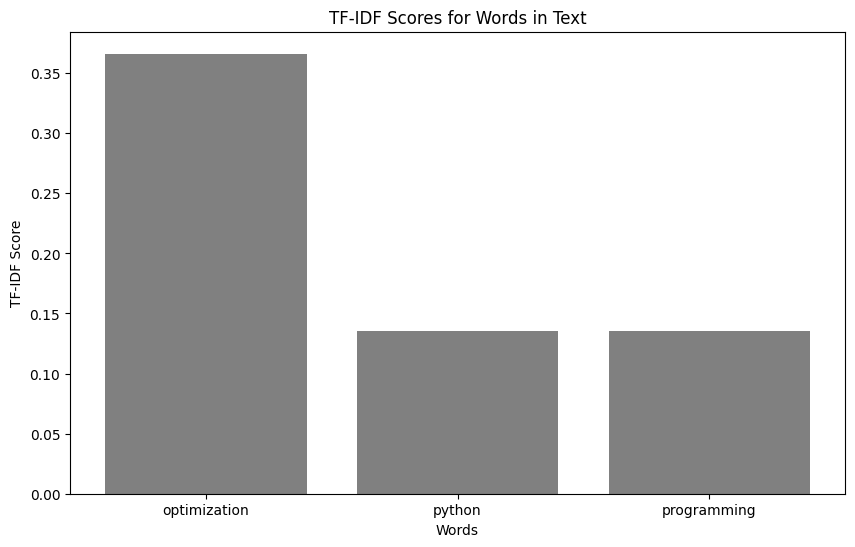

In [ ]:
# Using TF-IDF scores, this script evaluates the specificity of words in a given text compared with a set of documents.
import matplotlib.pyplot as plt
import math
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
nltk.download('stopwords')
from collections import Counter

stop_words = set(stopwords.words('english'))
#stop_words = set(stopwords.words('french'))

# Text whose specificity we want to evaluate
text = "python programming optimization"
text_without_stopwords = [word for word in text.lower().split() if word not in stop_words]

# List of all documents, each document is a simple sentence
documents = [
    "programming in python offers flexibility and powerful features, python is widely used",
    "machine learning models require large datasets for training, programming models efficiently is key",
    "optimizing code can significantly improve performance, especially in python environments"
]

tf = Counter(text_without_stopwords)
total_words = len(text_without_stopwords)
tf = {word: count / total_words for word, count in tf.items()}
word_doc_counts = {word: sum(1 for doc in documents if word in doc.lower().split()) for word in tf}
idf = {word: math.log(len(documents) / max(count, 1)) for word, count in word_doc_counts.items()}
tf_idf = {word: tf[word] * idf[word] for word in tf}
sorted_tf_idf = sorted(tf_idf.items(), key=lambda item: item[1], reverse=True)
print("Results: ",sorted_tf_idf)

# Visualization:
words, scores = zip(*sorted_tf_idf)
plt.figure(figsize=(10, 6))
plt.bar(words, scores, color='grey')
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.title('TF-IDF Scores for Words in Text')
plt.show()

👉 *See also https://christofs.github.io/txm-tutorial_en/#/*

### `4-7) Hapax`
An hapax is a word that occurs only once within a text (such as classic literature or historical scriptures).

In [ ]:
# This code identifies and prints words that appear only once in a given text.
from collections import Counter

input_text = """
Transformers are a deep learning model crucial for natural language processing (NLP), introduced in the "Attention is All You Need"
paper by Vaswani et al. They excel in tasks like machine translation, text summarization, and sentiment analysis due to the self-attention mechanism.
This mechanism helps the model prioritize different parts of the input, enabling it to manage long-range dependencies effectively.
Models like BERT, GPT, and T5, using transformer technology, have significantly advanced NLP by setting new benchmarks
in language understanding, text generation, and question-answering. A word cloud of this content would highlight the most frequent terms used.
"""
words = input_text.lower().replace(',', '').replace('?', '').split()
word_counts = Counter(words)
hapaxes = [word for word, count in word_counts.items() if count == 1]
print("The hapaxe are: ", hapaxes)

The hapaxe are:  ['transformers', 'are', 'deep', 'learning', 'crucial', 'for', 'natural', 'processing', '(nlp)', 'introduced', '"attention', 'is', 'all', 'you', 'need"', 'paper', 'vaswani', 'et', 'al.', 'they', 'excel', 'tasks', 'machine', 'translation', 'summarization', 'sentiment', 'analysis', 'due', 'self-attention', 'mechanism.', 'mechanism', 'helps', 'prioritize', 'different', 'parts', 'input', 'enabling', 'it', 'manage', 'long-range', 'dependencies', 'effectively.', 'models', 'bert', 'gpt', 't5', 'using', 'transformer', 'technology', 'have', 'significantly', 'advanced', 'nlp', 'setting', 'new', 'benchmarks', 'understanding', 'generation', 'question-answering.', 'word', 'cloud', 'content', 'would', 'highlight', 'most', 'frequent', 'terms', 'used.']


### `4-8) N-Grams`
N-grams are contiguous sequences of n items (words, characters, or symbols) in a given text or speech. The "n" in n-grams represents the number of items in each sequence. For example:
*   Unigrams (1-grams): ["Life", "is", "good"]
*   Bigrams (2-grams): ["Life is", "is good"]
*   Trigrams (3-grams): ["Life is good"]

In [ ]:
# This code tokenizes the provided text into words, generates n-grams, counts their occurrences,
# and prints the most frequent n-grams along with their counts.
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk import ngrams
from collections import Counter

input_text = """
Transformers are a deep learning model crucial for natural language processing (NLP), introduced in the "Attention is All You Need"
paper by Vaswani et al. They excel in tasks like machine translation, text summarization, and sentiment analysis due to the self-attention mechanism.
This mechanism helps the model prioritize different parts of the input, enabling it to manage long-range dependencies effectively.
Models like BERT, GPT, and T5, using transformer technology, have significantly advanced NLP by setting new benchmarks
in language understanding, text generation, and question-answering. A word cloud of this content would highlight the most frequent terms used.
"""

tokens = word_tokenize(input_text.lower())

n = 2 # spécifier la longueur des ngrammes:
r = 5 # spécifier le nombre de ngrammes à afficher

n_grams = ngrams(tokens, n)
n_grams_counts = Counter(n_grams)
most_frequent_ngrams = n_grams_counts.most_common(r)
for n_gram, count in most_frequent_ngrams:
    print(f"{n}-gram: {' '.join(n_gram)} --> Count: {count}")

2-gram: , and --> Count: 3
2-gram: , text --> Count: 2
2-gram: transformers are --> Count: 1
2-gram: are a --> Count: 1
2-gram: a deep --> Count: 1


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


👉 *See also: https://books.google.com/ngrams/ and https://bookworm.htrc.illinois.edu/develop/#*


### `4-9) Co-occurences`
Co-occurrences refer to the frequency with which two elements appear together in a context.

In [ ]:
# The script tokenizes a provided text, counts context pairs for a given word within a specified window before and after it, and prints it with its frequency.
import nltk
nltk.download('punkt_tab')
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
#stop_words = set(stopwords.words('french'))

input_text = """
Transformers are a deep learning model crucial for natural language processing (NLP), introduced in the "Attention is All You Need"
paper by Vaswani et al. They excel in tasks like machine translation, text summarization, and sentiment analysis due to the self-attention mechanism.
This mechanism helps the model prioritize different parts of the input, enabling it to manage long-range dependencies effectively.
Models like BERT, GPT, and T5, using transformer technology, have significantly advanced NLP by setting new benchmarks
in language understanding, text generation, and question-answering. A word cloud of this content would highlight the most frequent terms used.
"""

tokens = word_tokenize(input_text)
stop_words = set(stopwords.words('english'))

context_window = 2  # spécifier la largeur de la fenêtre
target_word = "machine"   # spécifier le mot visé

# Filter out stopwords and create context pairs
context_pairs = [(target_word, tokens[i + j].lower()) for i, word in enumerate(tokens)
                 for j in range(-context_window, context_window + 1)
                 if i + j >= 0 and i + j < len(tokens) and j != 0
                 if word.lower() == target_word.lower()]  #and tokens[i + j].lower() not in stop_words]

# Count co-occurrences
co_occurrences = FreqDist(context_pairs)

for pair, count in co_occurrences.items():
    print(f"Co-occurrence of '{pair[0]}' & '{pair[1]}' --> {count}")

Co-occurrence of 'machine' & 'tasks' --> 1
Co-occurrence of 'machine' & 'like' --> 1
Co-occurrence of 'machine' & 'translation' --> 1
Co-occurrence of 'machine' & ',' --> 1


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


👉 *See also https://www.frantext.fr/ and https://www.sketchengine.eu/*

### `4-10) Lexical Relationships`
Lexical relationships are connections between one word and other words in the language, based on their meanings such as synonyms (similar), antonyms (opposite), hyponyms (specific), and hypernyms (broader).
We can find lexical relationships in various ways: ontological databases (WordNet, DBpedia...), pre-trained language models (BERT, GPT-4...), and analysis of word embeddings (Word2Vec, GloVe...).

In [ ]:
# This code uses the NLTK library's WordNet module to find and print the word's synonyms, antonyms, hyponyms, and hypernyms, demonstrating its lexical relationships.
import nltk
nltk.download('wordnet')
#nltk.download('omw-1.4')  # Open Multilingual WordNet
from nltk.corpus import wordnet

synonyms, antonyms, hyponyms, hypernyms = set(), set(), set(), set()
#word = input("Enter a word to find its lexical relations: ")
word = "city"
for syn in wordnet.synsets(word):
    for lemma in syn.lemmas():
        synonyms.add(lemma.name())  # Add synonyms
        if lemma.antonyms():
            antonyms.add(lemma.antonyms()[0].name())  # Add antonyms

    for hypo in syn.hyponyms():
        hyponyms.update(lemma.name() for lemma in hypo.lemmas())  # Add hyponyms
    for hyper in syn.hypernyms():
        hypernyms.update(lemma.name() for lemma in hyper.lemmas())  # Add hypernyms

print("Synonyms: ", list(synonyms))
print("Antonyms: ", list(antonyms))
print("Hyponyms: ", list(hyponyms))
print("Hypernyms:", list(hypernyms))

[nltk_data] Downloading package wordnet to /root/nltk_data...


Synonyms:  ['urban_center', 'metropolis', 'city']
Antonyms:  []
Hyponyms:  ['national_capital', 'provincial_capital', 'state_capital']
Hypernyms: ['municipality', 'administrative_district', 'territorial_division', 'administrative_division']


### `4-11) Parts of Speech`
Morpho-syntactic labeling (POS) is a linguistic analysis process that involves assigning grammatical categories, such as nouns, verbs, adjectives, and more, to individual words within a sentence based on their morphological and syntactic characteristics.

In [ ]:
# The follwing code uses the spaCy library to identify and print each word's text and its part of speech tag.
!pip install spacy > /dev/null 2>&1
import spacy
nlp_eng = spacy.load('en_core_web_sm')
#nlp_fra = spacy.load('fr_core_news_sm')

input_text = "Cats are running and playing in the garden."
doc = nlp_eng(input_text)
for token in doc:
    print(f"Token: {token.text} --> POS: {token.pos_}")

Token: Cats --> POS: NOUN
Token: are --> POS: AUX
Token: running --> POS: VERB
Token: and --> POS: CCONJ
Token: playing --> POS: VERB
Token: in --> POS: ADP
Token: the --> POS: DET
Token: garden --> POS: NOUN
Token: . --> POS: PUNCT


👉 *See https://spacy.io/usage/linguistic-features#pos-tagging and https://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/*

### `4-12) Dependency Parsing`
Dependency parsing identifies relationships between words in a sentence, linking each based on its grammatical function like subject, object, complement or modifier.

In [ ]:
!pip install spacy > /dev/null 2>&1

import spacy
from spacy import displacy
nlp_eng = spacy.load('en_core_web_sm')
#nlp_fra = spacy.load('fr_core_news_sm')

# This script uses the spaCy library to generate the syntactic dependency of the input text, showing how each word relates to others.
input_text = "The cat eats an apple."
doc = nlp_eng(input_text)
displacy.render(doc, style='dep', jupyter=True) #options={'distance': 111,'color': 'white','bg': 'black'}
for token in doc:
  print(f"{token.text} ({token.pos_}) <--{token.dep_} ({spacy.explain(token.dep_)})-- {token.head.text} ({token.head.pos_})")

The (DET) <--det (determiner)-- cat (NOUN)
cat (NOUN) <--nsubj (nominal subject)-- eats (VERB)
eats (VERB) <--ROOT (root)-- eats (VERB)
an (DET) <--det (determiner)-- apple (NOUN)
apple (NOUN) <--dobj (direct object)-- eats (VERB)
. (PUNCT) <--punct (punctuation)-- eats (VERB)


💡*See also: https://lindat.mff.cuni.cz/services/udpipe/*

### `4-13) Morphosyntactic analysis`

In [ ]:
# This script uses spacy to extract present tense verbs.
!pip install spacy > /dev/null 2>&1
!python -m spacy download fr_core_news_md > /dev/null 2>&1

import spacy

nlp_fra = spacy.load('fr_core_news_md')
input_text = "Je mange une pomme. Tu parles très bien français. Hier, nous avons couru dans le parc."
present_verbs = []
doc = nlp_fra(input_text)
for token in doc:
    if token.pos_ == "VERB" and token.morph.get("Tense") == ["Pres"]:
        present_verbs.append(token.text)
print("Verbes au présent:", present_verbs)

Verbes au présent: ['mange', 'parles']


💡See also: https://spacy.io/usage/linguistic-features

## `--------------------------------`

## `5 Data Extraction`

### `5-1) Keywords Extraction`
Keywords Extraction is the process of identifying and isolating significant terms or phrases from a body of text, enabling a concise representation of the document's main themes or topics.

In [ ]:
# This script uses KeyBERT to extract the top n keywords from a given text.
!pip install keybert > /dev/null 2>&1

from keybert import KeyBERT

input_text = """
Transformers are a deep learning model crucial for natural language processing (NLP), introduced in the "Attention is All You Need"
paper by Vaswani et al. They excel in tasks like machine translation, text summarization, and sentiment analysis due to the self-attention mechanism.
This mechanism helps the model prioritize different parts of the input, enabling it to manage long-range dependencies effectively.
Models like BERT, GPT, and T5, using transformer technology, have significantly advanced NLP by setting new benchmarks
in language understanding, text generation, and question-answering. A word cloud of this content would highlight the most frequent terms used.
"""
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(input_text.lower(), top_n=5, stop_words='english', highlight=True, use_mmr=True)
print("Extracted keywords: ", keywords)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

transformers are deep learning model crucial for natural language processing nlp introduced in the attention is all
you need paper by vaswani et al they excel in tasks like machine translation text summarization and sentiment 
analysis due to the self attention mechanism this mechanism helps the model prioritize different parts of the input
enabling it to manage long range dependencies effectively models like bert gpt and t5 using transformer technology 
have significantly advanced nlp by setting new benchmarks in language understanding text generation and question 
answering word cloud of this content would highlight the most frequent terms used

Extracted keywords:  [('transformers', 0.494), ('nlp', 0.3866), ('attention', 0.3637), ('cloud', 0.2744), ('benchmarks', 0.1701)]


### `5-2) Quotation Extraction`
Quotations are snippets of text, typically enclosed in double quotes, that represent someone else's words.

In [ ]:
# The script uses a regular expression to extract and print all phrases enclosed in double quotes from a provided text.
import re

text = """
As Jane walked into the room, Mark exclaimed, "I can't believe how late it is!" Jane replied, "Yes, the time really flew by today."
Later, during the meeting, their boss said, "We need to finalize the project plan by tomorrow." Susan added, "I've already emailed everyone the latest draft."
In her email, Susan wrote, "Please review the attached document and provide feedback by noon tomorrow."
"""
rgx = r'"(.*?)"'
quotations = re.findall(rgx, text)
for i, quote in enumerate(quotations, start=1):
    print(f"{i}. {quote}")

1. I can't believe how late it is!
2. Yes, the time really flew by today.
3. We need to finalize the project plan by tomorrow.
4. I've already emailed everyone the latest draft.
5. Please review the attached document and provide feedback by noon tomorrow.


🔥 *The [Regular Expressions](https://en.wikipedia.org/wiki/Regular_expression) are patterns used to match and manipulate strings based on specific rules.*

🚴 *Instead of quotations, try to capture words that start with a capital letter using the regex pattern \b[A-Z][a-z]*\b *

### `5-3) Named entities recognition (NER)`
The NER task involves identifying and classifying proper nouns, such as people, organizations, locations, and more, within a text corpus.

In [ ]:
# Using SpaCy to extract NE from input text
!pip install spacy > /dev/null 2>&1

import spacy
from spacy import displacy
nlp_eng = spacy.load('en_core_web_sm')
#nlp_fra = spacy.load('fr_core_news_sm')

input_text = "Apple announced that they will open a new campus in Austin, Texas, which will cost 1 billion dollars."
doc = nlp_eng(input_text)
for ent in doc.ents:
    print(ent.text, ent.label_)
displacy.render(doc, style='ent', jupyter=True)

Apple ORG
Austin GPE
Texas GPE
1 billion dollars MONEY


In [ ]:
# NER with a pre-trained BERT model
from transformers import pipeline
import pandas as pd
input_text = "Apple announced that they will open a new campus in Austin, Texas, which will cost 1 billion dollars."
ner = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english", grouped_entities=True)
pd.DataFrame(ner(input_text))

config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


,entity_group,score,word,start,end
0,ORG,0.998903,Apple,0,5
1,LOC,0.999056,Austin,52,58
2,LOC,0.999723,Texas,60,65


🎯 *Entity Disambiguation and Linking: After performing NER, the next important step is to identify names that refer to the same entity. For example, "Barack Obama", "Obama", and "President Obama" refer interchangeably to the same person. Disambiguating these names and linking them to a unique identifier or database can make them much more useful in answering applied questions.*

### `5-4) Visualization of Named Location Entities`
This method allows for the visualization of named location entities on a geographical map, which involves identifying the named entities, finding their geographical coordinates, and then projecting them onto a map.


In [ ]:
# This script identifies location entities in text with spacy, geocodes them with Geopy, and visualizes them on a map using Folium.
!pip install spacy > /dev/null 2>&1

import spacy
from spacy import displacy
nlp_eng = spacy.load('en_core_web_sm')
#nlp_fra = spacy.load('fr_core_news_sm')
import folium
from geopy.geocoders import Nominatim

input_text = "John visited Paris and London last summer."
doc = nlp_eng(input_text)
locations = [ent.text for ent in doc.ents if ent.label_ == 'GPE']
map = folium.Map(location=(0, 0), zoom_start=3)

for location in locations:
    geolocator = Nominatim(user_agent="location_mapper")
    location_info = geolocator.geocode(location)
    if location_info:
        coord = (location_info.latitude, location_info.longitude)
        folium.Marker(location=coord, popup=location).add_to(map)
map.save("location_map.html")
map

📍*See also Tanagra tool https://github.com/obtic-sorbonne/Tanagra2?tab=readme-ov-file*

### `5-5) Visualization of Named Person Entities`
This method allows for the visualization of named person entities in a network. This involves identifying the names of people and then connecting them through various means, such as dialogues or physical meetings, etc.

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


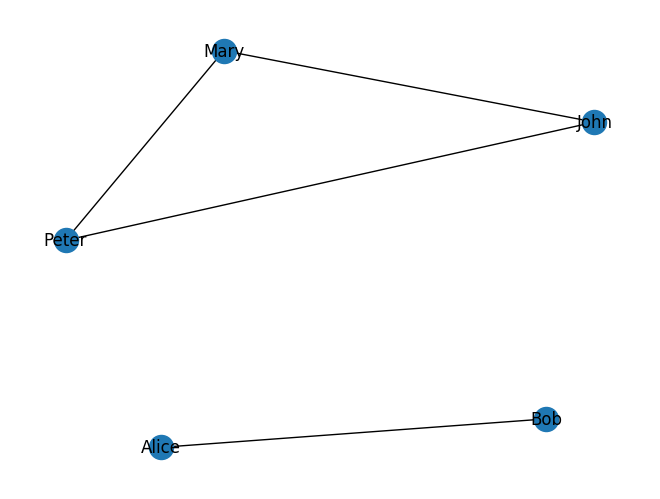

In [ ]:
# This script builds and visualizes a graph of person co-occurrences from a text.
import networkx as nx
import spacy
from spacy import displacy
nlp_eng = spacy.load('en_core_web_sm')
#nlp_fra = spacy.load('fr_core_news_sm')
import nltk
from nltk import sent_tokenize
nltk.download('punkt_tab')
import matplotlib.pyplot as plt

input_text = "John and Mary met Peter yesterday. Alice and Bob had lunch together."
sentences = sent_tokenize(input_text)
G = nx.Graph()

for sentence in sentences:
    doc = nlp_eng(sentence)
    G.add_nodes_from([ent.text for ent in doc.ents if ent.label_ == "PERSON"])
    for i in range(len(doc.ents)):
        for j in range(i + 1, len(doc.ents)):
            if doc.ents[i].label_ == "PERSON" and doc.ents[j].label_ == "PERSON":
                G.add_edge(doc.ents[i].text, doc.ents[j].text)

pos = nx.spring_layout(G, k=50)

nx.draw(G, pos, with_labels=True)
plt.show()

📍*See also Renard tool https://pypi.org/project/renard-pipeline/*

## `--------------------------------`

## `6 Advanced text analysis (classification)`

### `6-1) Subjectivity Detection`
The goal in this task is to detect whether a sentence is objective or subjective. A sentence is subjective if its content is based on or influenced by personal feelings, tastes, or opinions. Otherwise, the sentence is objective.

In [ ]:
# This script uses a pre-trained multilingual model to classify sentences as subjective or objective
!pip install transformers tensorflow --upgrade > /dev/null 2>&1

from transformers import pipeline
classifier = pipeline('text-classification', model='GroNLP/mdebertav3-subjectivity-multilingual')

sentence = "The sky is blue!"
result = classifier(sentence)[0]
label = "objective" if result['label'] == "LABEL_0" else "subjective"
print(f"The sentence: [{sentence}] is {label} (Score: {result['score']:.2f})")


config.json:   0%|          | 0.00/881 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/412 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

The sentence: [The sky is blue!] is objective (Score: 0.68)


### `6-2) Sentiment Analysis`
Sentiment Analysis is the process of determining the positive, negative, or neutral tone of a text.

In [ ]:
# This code uses a sentiment analysis model to evaluate the sentiment of an input text.
!pip install transformers tensorflow --upgrade > /dev/null 2>&1

from transformers import pipeline
classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

input_text = "I like using transformers for natural language processing!"
results = classifier(input_text)
star_rating = int(results[0]['label'].split()[0])  # Extraire le nombre d'étoiles
sentiment_value = (star_rating - 3) / 2
sentiment = "negative" if star_rating in [1, 2] else "neutral" if star_rating == 3 else "positive"
print(f"Sentence: {input_text}")
print(f"Star Rating: {star_rating}")  # Rates the text by assigning a rating from 1 star (very negative) to 5 stars (very positive)
print(f"Sentiment: {sentiment}")      # Classifies the sentiment of the text as positive, neutral, or negative
print(f"Score: {results[0]['score']:.2f}")  # Provides a confidence score for the sentiment prediction

Sentence: I like using transformers for natural language processing!
Star Rating: 5
Sentiment: positive
Score: 0.54


In [ ]:
import numpy as np
import plotly.graph_objects as go

normalized_value = (sentiment_value + 1) / 2
hand_angle = np.pi * (1 - normalized_value)

fig = go.Figure(
    data=[go.Pie(
        values=[0.5, 1/6, 1/6, 1/6],
        rotation=90,
        hole=0.5,
        marker_colors=["white", "#2bad4e", "#f2a529", "#f25829"],
        text=["", "<b>Positif</b>", "<b>Neutre</b>", "<b>Négatif</b>"],
        textinfo="text",
        hoverinfo="skip",
    )],
    layout=go.Layout(
        showlegend=False,
        margin=dict(b=0,t=10,l=10,r=10),
        width=450,
        height=450,
        paper_bgcolor="white",
        shapes=[
            dict(type="circle", x0=0.48, x1=0.52, y0=0.48, y1=0.52,
                 fillcolor="#333", line_color="#333"),
            dict(type="line", x0=0.5, y0=0.5,
                 x1=0.5 + np.sqrt(2)/4 * np.cos(hand_angle),
                 y1=0.5 + np.sqrt(2)/4 * np.sin(hand_angle),
                 line=dict(color="#333", width=4))
        ]
    )
)
fig.show()

### `6-3) Emotion Analysis`
Emotion Analysis is the process of identifying specific emotions expressed in a text: joy, anger, sadness...

In [ ]:
# This script performs fine-grained sentiment analysis (emotions) on an input text using a pre-trained model.
# Fine-grained sentiment analysis --> emotions (Ekman classification):
!pip install transformers tensorflow --upgrade > /dev/null 2>&1

from transformers import pipeline
import plotly.graph_objects as go

classifier = pipeline("text-classification", model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True, top_k=None)
input_text = """
As Sarah walked through the dark forest, fear crept up her spine with every rustle of leaves.
She suddenly heard a loud crack behind her, turning around in surprise.
Her heart raced with happiness when she saw her lost dog running towards her, wagging its tail.
Relief washed over her, but soon, anger set in as she thought about how her pet had wandered off.
She felt a pang of sadness remembering her worries from earlier.
Finally, Sarah sat down on a rock, looking around in awe at the beauty of the forest that had brought out such a mix of emotions.
"""
results = classifier(input_text)
emotions = [result['label'] for result in results[0]]
scores = [result['score'] for result in results[0]]

for emotion, score in zip(emotions, scores):
    print(f"{emotion}: {score:.4f}")

source = [0] * len(emotions)
target = list(range(1, len(emotions) + 1))
value = scores
fig = go.Figure(data=[go.Sankey(
    node=dict(pad=55, thickness=55, line=dict(color="black", width=0.5), label=["Input Text"] + emotions, color="black"),
    link=dict(source=source, target=target, value=value)
)])
fig.update_layout(title_text="Emotion Classification", font_size=15)
fig.show()

config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

sadness: 0.8468
joy: 0.0730
fear: 0.0634
surprise: 0.0093
anger: 0.0044
love: 0.0031


tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

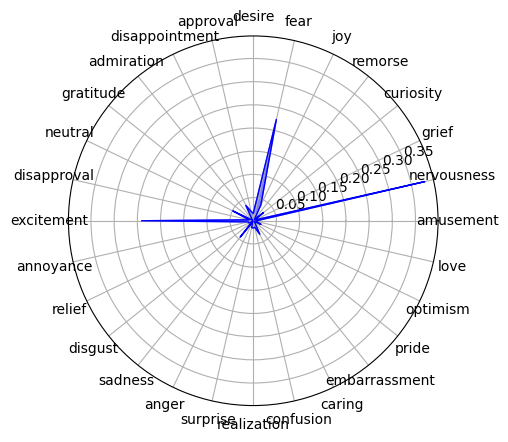

In [ ]:
# Using roberta-base-go_emotions, this script classifies the emotions in a given text and visualizes the results in a polar plot.
!pip install --upgrade transformers tensorflow tokenizers > /dev/null 2>&1

from transformers import RobertaTokenizer, RobertaForSequenceClassification, pipeline
import random
import numpy as np
import matplotlib.pyplot as plt

tokenizer = RobertaTokenizer.from_pretrained("SamLowe/roberta-base-go_emotions")
model = RobertaForSequenceClassification.from_pretrained("SamLowe/roberta-base-go_emotions")
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer, return_all_scores=True, top_k=None)

result = classifier("Filled with excitement, she nervously awaited the results, dreading the possibility of disappointment")
labels = [emotion['label'] for emotion in result[0]]
scores = [emotion['score'] for emotion in result[0]]
combined = list(zip(labels, scores))
random.shuffle(combined)
labels, scores = zip(*combined)
scores = list(scores) + [scores[0]]
angles = [n / float(len(labels)) * 2 * np.pi for n in range(len(labels))] + [0]
fig, ax = plt.subplots(subplot_kw=dict(polar=True))
ax.fill(angles, scores, color='blue', alpha=0.5)
ax.plot(angles, scores, color='blue', linewidth=1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.show()

👉 *See also https://obtic.huma-num.fr/ariane/*


Stance Detection

### `6-4) Readability Scoring`
Readability scales are tools or formulas used to assess the readability of a written text. They provide a quantitative measure of how easy or difficult a piece of writing is to understand. These scales are often used in education, publishing, and communication fields to ensure that written material is appropriate for its target audience.

In [ ]:
# This script calculates and prints the Flesch Reading Ease Score for a given text.
!pip install textstat > /dev/null 2>&1

import textstat

text = """
The moon hung low in the night sky, casting a soft glow over the ancient castle.
The air was thick with mystery and a sense of impending adventure.
"""
# A score of 90-100 is considered very easy, 60-70 is standard, and 0-30 is very difficult.
flesch_reading_ease = textstat.flesch_reading_ease(text)
print(f"Flesch Reading Ease Score: {flesch_reading_ease}")

Flesch Reading Ease Score: 82.65


See https://en.wikipedia.org/wiki/Common_European_Framework_of_Reference_for_Languages

### `6-5) Topic models`
Topic models are statistical models that aim to identify topics present in a collection of text documents, providing a way to uncover hidden thematic structures within large sets of textual data.

In [ ]:
# This script extracts embeddings using BERT and performs LDA topic modeling to identify key topics in a list of documents.
!pip install transformers tensorflow --upgrade pyLDAvis > /dev/null 2>&1

from transformers import pipeline
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
pyLDAvis.enable_notebook()

documents = [
    "Topic modeling is a technique to identify topics in a text corpus.",
    "Transformers are powerful models used for natural language processing.",
    "Latent Dirichlet Allocation is a popular algorithm for topic modeling.",
    "Hugging Face's transformers library provides pre-trained models for various tasks."
]

# Use transformers to extract embeddings:
feature_extraction_pipeline = pipeline("feature-extraction", model="bert-base-uncased", tokenizer="bert-base-uncased")
embeddings = [feature_extraction_pipeline(document)[0] for document in documents]

# Perform LDA topic modeling using gensim:
tokenized_documents = [document.split() for document in documents]
dictionary = corpora.Dictionary(tokenized_documents)
corpus = [dictionary.doc2bow(document) for document in tokenized_documents]

lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary)

# Each topic is represented by a list of words, and the numbers associated with each word indicate the importance of that word in the respective topic.
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print("Topic {}: {}".format(topic[0]+1, topic[1]))
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Topic 1: 0.097*"a" + 0.066*"is" + 0.047*"Topic" + 0.047*"technique" + 0.047*"identify"
Topic 2: 0.061*"for" + 0.061*"models" + 0.061*"tasks." + 0.061*"pre-trained" + 0.061*"library"
Topic 3: 0.072*"for" + 0.050*"powerful" + 0.050*"models" + 0.050*"language" + 0.050*"are"


👉 *See also https://mimno.infosci.cornell.edu/jsLDA/, https://marat.uchicago.edu/topologic/voltaire_only_letters_big/ and https://agoldst.github.io/dfr-browser/demo/#/model/grid*

### `6-6) Comparison`
In NLP, texts can be compared based on form (tokens, n-grams...), statistics (classification...), or vector representations (embeddings from Word2Vec, BERT, GPT...), etc.
To compare forms, we can use different levels of granularity: character, word, or line.

In [ ]:
# This script performs a character-by-character comparison of two texts, highlighting replacements, deletions, and additions
import difflib
from IPython.display import HTML, display

text1 = "I like natural language processing"
text2 = "Natural language procesing is interesting"

def highlight_diffs(text1, text2):
    matcher = difflib.SequenceMatcher(None, text1, text2)
    output1 = []
    output2 = []
    for tag, i1, i2, j1, j2 in matcher.get_opcodes():
        if tag == 'replace':
            output1.append('<span style="background-color: #ffd700;">' + ''.join(text1[i1:i2]) + '</span>')
            output2.append('<span style="background-color: #ffd700;">' + ''.join(text2[j1:j2]) + '</span>')
        elif tag == 'delete':
            output1.append('<span style="background-color: #fbb6c2;">' + ''.join(text1[i1:i2]) + '</span>')
            output2.append('<span></span>')
        elif tag == 'insert':
            output1.append('<span></span>')
            output2.append('<span style="background-color: #d4fcbc;">' + ''.join(text2[j1:j2]) + '</span>')
        elif tag == 'equal':
            output1.append(''.join(text1[i1:i2]))
            output2.append(''.join(text2[j1:j2]))
    return ''.join(output1), ''.join(output2)

def compare_texts(text1, text2):
    # Character by character comparison
    char_diff1, char_diff2 = highlight_diffs(text1, text2)

    # Display the results
    display(HTML('<table><tr><td><pre>' + char_diff1 + '  </pre></td><td><pre>  ' + char_diff2 + '</pre></td></tr></table>'))

compare_texts(text1, text2)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



I like natural language processing,Natural language procesing is interesting


In [ ]:
# This script uses the 'textdistance' library to calculate different types of text similarities and distances.
!pip install textdistance > /dev/null 2>&1

import textdistance

text1 = "I like natural language processing."
text2 = "Natural language processing is interesting."

# Edit-based distance (Levenshtein...): Counts minimum edits needed (insertions, deletions, substitutions) to change one text into another.
levenshtein_score = textdistance.levenshtein(text1, text2)

# Token-based similarity (Jaccard...): Assesses similarity by comparing the sets of words from both texts
jaccard_score = textdistance.jaccard(text1.split(), text2.split())

# Sequence-based distance (Longest Common Subsequence): Measures the distance based on the length of the longest common subsequence
lcs_score = textdistance.lcsstr.distance(text1, text2)

# Compression-based similarity (Ratcliff-Obershelp...): Uses the size of the compressed texts to estimate their similarity
ratcliff_obershelp_score = textdistance.ratcliff_obershelp(text1, text2)

print("Comparison Results:")
print(f"Levenshtein Distance (Edit-based): {levenshtein_score:.2f}")  # 0 (identical) to max(length of text1, length of text2) (different)
print(f"Jaccard Index (Token-based): {jaccard_score:.2f}")  # 0 (different) to 1 (identical)
print(f"LCS Distance (Sequence-based): {lcs_score:.2f}")  # 0 (identical) to min(length of text1, length of text2) (different)
print(f"Ratcliff-Obershelp Similarity (Compression-based): {ratcliff_obershelp_score:.2f}")  # 0 (different) to 1 (identical)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Comparison Results:
Levenshtein Distance (Edit-based): 23.00
Jaccard Index (Token-based): 0.11
LCS Distance (Sequence-based): 17.00
Ratcliff-Obershelp Similarity (Compression-based): 0.69


👉 *See also https://artflsrv04.uchicago.edu/text-pair/encyc_vs_tgb/*

In [ ]:
# This script uses embeddings generated by BERT to represent the sentences and
# then calculates the similarity score using cosine similarity
!pip install transformers tensorflow --upgrade > /dev/null 2>&1

from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

sentence1 = "I like natural language processing."
sentence2 = "Natural language processing is interesting."

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')

# Tokenize and obtain embeddings for each sentence
with torch.no_grad():
    tokens1 = tokenizer(sentence1, return_tensors='pt', truncation=True, padding=True)
    tokens2 = tokenizer(sentence2, return_tensors='pt', truncation=True, padding=True)

    embeddings1 = model(**tokens1).last_hidden_state.mean(dim=1).detach().numpy()
    embeddings2 = model(**tokens2).last_hidden_state.mean(dim=1).detach().numpy()

similarity_score = cosine_similarity(embeddings1, embeddings2).item()

print(f"\nSimilarity Score between the 2 sentences: {similarity_score:.2f}")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




Similarity Score between the 2 sentences: 0.87


🚧plagiarism / fact checking / fake news...

## `--------------------------------`

## `7 Text Generation and more...`

### `7-1) Text completion`
The text generation task involves using a pre-trained language model to automatically generate coherent and contextually relevant text based on a given prompt or input.

In [ ]:
# This script generates text based on a given prompt using a text generation pipeline
!pip install --quiet transformers tensorflow --upgrade > /dev/null 2>&1
from transformers import GPT2LMHeadModel, GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

prompt = "This training allows you to"
encoded_input = tokenizer.encode(prompt, return_tensors='pt')

output = model.generate(encoded_input, max_length=60, do_sample=True)
print(tokenizer.decode(output[0], skip_special_tokens=True))

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



This training allows you to learn about all the basic parts of building a strong foundation, and also shows you how to learn how to do a few things more easily.

In the process, they also gave you an overview and an outline so you can focus on building things. You can then show


### `7-2) Question-Answering (QA) and Conversation`
QA is an NLP task for developing models that can understand and respond to questions posed in human language with accurate and contextually relevant answers.

In [ ]:
input_text = "The Transformers library by Hugging Face is a powerful tool for natural language processing."
the_question = "What is Transformers library used for?"
qa = pipeline("question-answering")#, model="distilbert-base-cased-distilled-squad"
qa(context = input_text, question = the_question)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{'score': 0.8928294777870178,
 'start': 64,
 'end': 91,
 'answer': 'natural language processing'}

### `7-3) Summarization`
This task condenses and distills the key information from a given text, providing a concise summary that captures the essential content.

In [ ]:
# This script uses a summarization pipeline to condense a given input text into a summary with specified parameters.
!pip install transformers tensorflow --upgrade > /dev/null 2>&1

from transformers import pipeline

input_text = """
Natural language processing (NLP) is a field of artificial intelligence that focuses on the interaction between computers and humans through natural language.
The Transformers library, developed by Hugging Face, has become a cornerstone in the NLP community.
It provides a comprehensive set of tools and pre-trained models for various NLP tasks, ranging from text classification and named entity recognition to question answering and summarization.
"""
summarizer = pipeline("summarization")
summarizer(input_text, min_length=5, max_length=50, clean_up_tokenization_spaces=True, length_penalty=2.0, num_beams=4, temperature=0.7)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning:

`do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.



[{'summary_text': ' The Transformers library, developed by Hugging Face, has become a cornerstone in the NLP community. It provides a comprehensive set of tools and models for various NLP tasks.'}]

### `7-4) Translation`
Automatic translation is the process of utilizing computational models to convert text or speech from one language to another, enabling cross-language communication and comprehension.

In [ ]:
# This script translates the given English text into French using a translation pipeline.
!pip install transformers tensorflow --upgrade > /dev/null 2>&1

from transformers import pipeline

input_text = "The Transformers library by Hugging Face is a powerful tool for natural language processing."
translator = pipeline("translation_en_to_fr")
translator(input_text)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

[{'translation_text': 'La bibliothèque Transformers de Hugging Face est un outil puissant pour le traitement du langage naturel.'}]

### `7-5) Adjusting Text Readability Level`
This technique allows for making content more accessible by using lexical simplification, sentence shortening, and readability scoring to modify text complexity.

In [ ]:
!pip install transformers > /dev/null 2>&1

from transformers import pipeline
import torch
from transformers import pipeline
generator = pipeline("text2text-generation", model="google/flan-t5-small", device=0)

original_text = """
Climate change is a significant global issue that requires immediate attention and action from all countries.
Rising temperatures, melting ice caps, and increasing frequency of extreme weather events are just a few of the consequences of unchecked greenhouse gas emissions.
"""
target_level = 6  # Par exemple, cibler un niveau de 6e année

prompt = f"Rewrite the following text to be at a {target_level}-grade readability level:\n\n{original_text}"

response = generator(prompt, max_length=500, num_return_sequences=1)[0]['generated_text']

print("Original Text:\n", original_text)
print("Rewritten Text:\n", response)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Original Text:
 
Climate change is a significant global issue that requires immediate attention and action from all countries.
Rising temperatures, melting ice caps, and increasing frequency of extreme weather events are just a few of the consequences of unchecked greenhouse gas emissions.

Rewritten Text:
 Climate change is a significant global issue that requires immediate attention and action from all countries. Rising temperatures, melting ice caps, and increasing frequency of extreme weather events are just a few of the consequences of unchecked greenhouse gas emissions.


## `--------------------------------`

## `Extra: File Processing`   🚧

In this activity, we have simplified data processing by integrating a variable containing the text to be processed directly into the code.
To process files on the computer or directly online, you can follow these examples.

In [ ]:
# Méthode 1 : Téléverser des fichiers directement dans l'espace de travail Colab
# from google.colab import files

# uploaded = files.upload()
# for filename in uploaded.keys():
#     with open(filename, 'r', encoding='utf-8') as file:
#         content = file.read()
#         print(f'Contenu du fichier {filename}:\n{content}\n')

In [ ]:
# Méthode 2 : Téléverser les fichiers manuellement dans Google Drive, puis les traiter depuis le notebook Colab
# import os
# from google.colab import drive
# drive.mount('/content/drive')
#
# # Créez le dossier "input" dans votre Google Drive, puis téléversez-y vos fichiers :
# folder_path = '/content/drive/My Drive/input/'
#
# # Lit et affiche le contenu de chaque fichier texte dans le dossier
# for filename in os.listdir(folder_path):
#     if filename.endswith('.txt'):
#         file_path = os.path.join(folder_path, filename)
#         with open(file_path, 'r', encoding='utf-8') as file:
#             content = file.read()
#             print(f'Contenu du fichier {filename}:\n{content}\n')

In [ ]:
# Monter Google Drive pour accéder aux fichiers
# from google.colab import drive
# drive.mount('/content/drive')

# Spécifier le chemin du dossier où les fichiers sont stockés
# folder_path = '/content/data/'

# Charger un fichier CSV ou texte depuis le dossier spécifié
# import pandas as pd
# df = pd.read_csv("/content/data/....txt")  # Attention : vérifiez que le dossier "data" existe et contient les fichiers nécessaires

In [ ]:
# Méthode 3 : Lire vos données depuis une URL
# import requests

# url = 'https://example.com/path/to/your/file.txt'
# response = requests.get(url)

# Enregistrer le fichier localement
# with open('file.txt', 'wb') as file:
#     file.write(response.content)

# Lire et afficher le contenu du fichier
# with open('file.txt', 'r') as file:
#     print(file.read())

In [ ]:
# Méthode 4 : Lire des données depuis un fichier hébergé sur GitHub
# !wget https://raw.githubusercontent.com/username/repository/branch/path/to/your/file.txt

# Lire et afficher le contenu du fichier
# with open('file.txt', 'r') as file:
#     print(file.read())

In [ ]:
# Method 5: Reading data from a cloud service like Google Cloud Storage or Amazon S3
# to do...

## `--------------------------------`

#`End` 🏆 🎉 😊

<p xmlns:cc="http://creativecommons.org/ns#" >This material is created by Motasem ALRAHABI, it's distributed under the terms of the Creative Commons license <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">CC BY-NC-SA 4.0

<img style="height:11px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:11px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:11px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1"><img style="height:11px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p>


##`In Progress`  🚧

* AI: History, ethics and bias.
* Processing of other kinds of data: Audio, Video, Numbers...
* Prompt engineering
* concordancier et un moteur de recherche basique
* opensmile et praat
* RAG
* https://colab.research.google.com/drive/1U6x-3OVCGtx9CBZvzdJi8mhTxCx8k4Ie?usp=sharing#scrollTo=pCePLd9ZRvv1
